<a href="https://colab.research.google.com/github/dogukangur0/Custom_Dataset/blob/main/Intel_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pathlib
import zipfile

In [2]:
data_path = pathlib.Path("data/")
image_path = pathlib.Path("data/intel_image")

with zipfile.ZipFile(pathlib.Path("data/seg_train.zip"), "r") as train_zip_ref:
  train_zip_ref.extractall(image_path)

with zipfile.ZipFile(pathlib.Path("data/seg_test.zip"), "r") as test_zip_ref:
  test_zip_ref.extractall(image_path)

In [3]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
walk_through_dir(image_path)

There are 2 directories and 0 images in data/intel_image
There are 6 directories and 0 images in data/intel_image/seg_test
There are 0 directories and 474 images in data/intel_image/seg_test/forest
There are 0 directories and 510 images in data/intel_image/seg_test/sea
There are 0 directories and 553 images in data/intel_image/seg_test/glacier
There are 0 directories and 501 images in data/intel_image/seg_test/street
There are 0 directories and 525 images in data/intel_image/seg_test/mountain
There are 0 directories and 437 images in data/intel_image/seg_test/buildings
There are 6 directories and 0 images in data/intel_image/seg_train
There are 0 directories and 2271 images in data/intel_image/seg_train/forest
There are 0 directories and 2274 images in data/intel_image/seg_train/sea
There are 0 directories and 2404 images in data/intel_image/seg_train/glacier
There are 0 directories and 2382 images in data/intel_image/seg_train/street
There are 0 directories and 2512 images in data/int

Random image path: data/intel_image/seg_train/sea/2015.jpg
Image class: sea
Image height: 150
Image width: 150


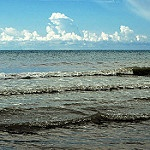

In [4]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
image = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {image.height}")
print(f"Image width: {image.width}")
image

(np.float64(-0.5), np.float64(149.5), np.float64(149.5), np.float64(-0.5))

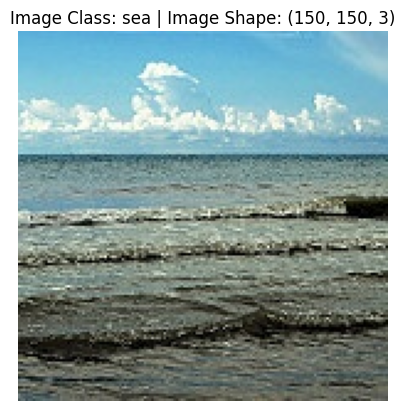

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# view with matplotlib
# 1 convert from image to array

image_array = np.asarray(image)
plt.figure()
plt.imshow(image_array)
plt.title(f"Image Class: {random_image_path.parent.stem} | Image Shape: {image_array.shape}" )
plt.axis("off")

In [6]:
# transforming data
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

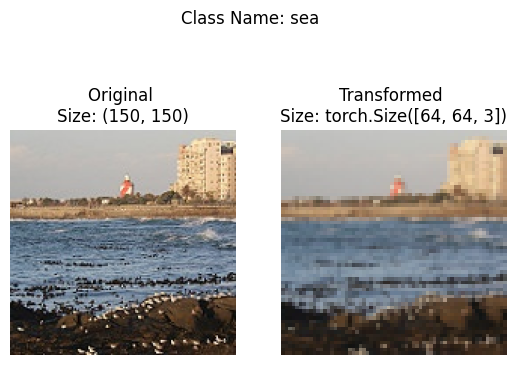

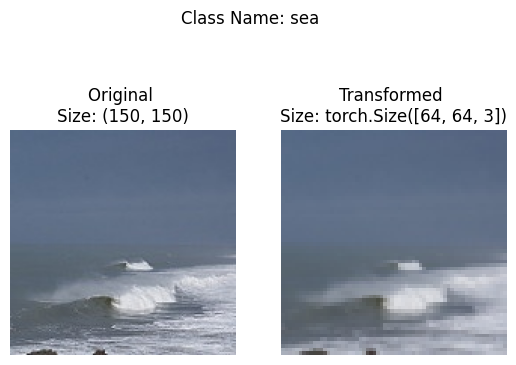

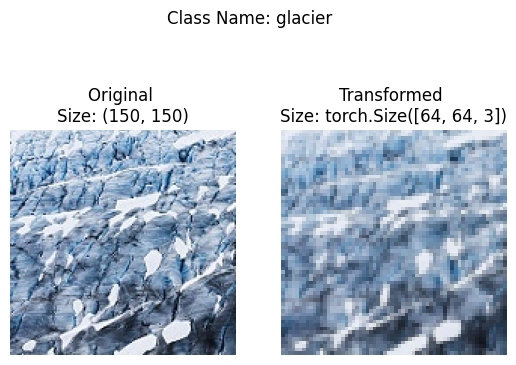

In [8]:
image_path_list = list(pathlib.Path("data/intel_image").glob("*/*/*.jpg"))
random_images = random.sample(image_path_list, 3)
for random_image in random_images:
  with Image.open(random_image) as image:
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(image)
    axes[0].set_title(f"Original \nSize: {image.size}")
    axes[0].axis(False)

    transformed_image = transform(image).permute(1,2,0)
    axes[1].imshow(transformed_image)
    axes[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
    axes[1].axis(False)

    fig.suptitle(f"Class Name: {random_image.parent.stem}")

In [9]:
# Loading Image Data
train_data = torchvision.datasets.ImageFolder(root = pathlib.Path("data/intel_image/seg_train"), transform = transform, target_transform = None)
test_data = torchvision.datasets.ImageFolder(root = pathlib.Path("data/intel_image/seg_test"), transform = transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 14034
     Root location: data/intel_image/seg_train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 3000
     Root location: data/intel_image/seg_test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [10]:
train_data.classes, train_data.class_to_idx

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
 {'buildings': 0,
  'forest': 1,
  'glacier': 2,
  'mountain': 3,
  'sea': 4,
  'street': 5})

In [11]:
train_data[0]    # tensor value and label value of first image
train_data[0][0] # tensor of first image
train_data[0][1] # label of first image

0

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

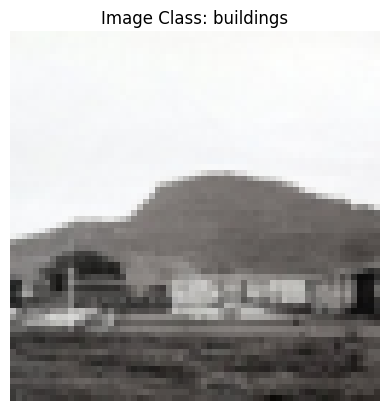

In [12]:
image, label = train_data[0][0], train_data[0][1]
plt.figure()
plt.imshow(image.permute(1,2,0))
plt.title(f"Image Class: {train_data.classes[label]}")
plt.axis("off")

In [13]:
# Turn Loadad Images Into DataLoader
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataLoader = torch.utils.data.DataLoader(dataset = train_data, batch_size = BATCH_SIZE, num_workers = NUM_WORKERS, shuffle = True)
test_dataLoader = torch.utils.data.DataLoader(dataset = test_data, batch_size = BATCH_SIZE, num_workers = NUM_WORKERS, shuffle = False)

In [14]:
train_dataLoader, test_dataLoader

(<torch.utils.data.dataloader.DataLoader at 0x7e4427637b10>,
 <torch.utils.data.dataloader.DataLoader at 0x7e4427637a10>)

In [15]:
images, labels = next(iter(train_dataLoader))
images.shape, labels.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

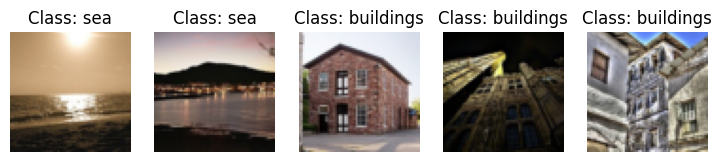

In [16]:
images, labels = next(iter(train_dataLoader))
fig, axes = plt.subplots(1,5, figsize = (9,6))
for i in range(5):
  images = images.squeeze()
  img = images[i].permute(1,2,0)
  axes[i].imshow(img)
  axes[i].set_title(f"Class: {train_data.classes[labels[i]]}")
  axes[i].axis("off")

In [17]:
class_names = sorted([entry.name for entry in list(os.scandir(pathlib.Path("data/intel_image/seg_train")))])
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [24]:
from typing import Tuple, Dict, List
def find_classes(directory : str) -> Tuple[List[str], Dict[str, int]]:
  class_names = sorted(entry.name for entry in os.scandir("data/intel_image/seg_train"))
  class_to_idx = {class_name : i for i, class_name in enumerate(class_names)}
  return class_names, class_to_idx

In [25]:
find_classes(pathlib.Path("data/image_intel/seg_train"))

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
 {'buildings': 0,
  'forest': 1,
  'glacier': 2,
  'mountain': 3,
  'sea': 4,
  'street': 5})

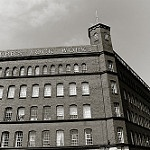

In [20]:
random_sample = random.choice(list(pathlib.Path("data/intel_image/seg_train").glob("*/*.jpg")))
Image.open(random_sample)

In [21]:
list(pathlib.Path("data/intel_image/seg_train").glob("*/*.jpg"))[0]

PosixPath('data/intel_image/seg_train/forest/1063.jpg')

In [26]:
from PIL import Image
from torch.utils.data import Dataset

class CustomImageFolder(Dataset):
  def __init__(self, directory, transform = None): # directory -> train or test data directory
    self.path = list(pathlib.Path(directory).glob("*/*.jpg"))
    self.transform = transform
    self.classes = sorted(empty.name for empty in os.scandir(pathlib.Path("data/intel_image/seg_train")) if empty.is_dir())
    self.class_to_idx = {class_name: i for i, class_name in enumerate(self.classes)}

  def load_image(self, index):
    image = self.path[index]
    return Image.open(image)

  def __len__(self):
    return len(self.path)

  def __getitem__(self, index):
    image = self.load_image(index)
    class_name = self.path[index].parent.stem
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(image), class_idx
    else:
      image, class_idx

In [28]:
custom_train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])
custom_test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [30]:
custom_train_data = CustomImageFolder(directory = pathlib.Path("data/intel_image/seg_train"), transform = custom_train_transform)
custom_test_data = CustomImageFolder(directory = pathlib.Path("data/intel_image/seg_test"), transform = custom_test_transform)

In [31]:
custom_train_data, custom_test_data

(<__main__.CustomImageFolder at 0x7e433281d650>,
 <__main__.CustomImageFolder at 0x7e432bf1b850>)

In [32]:
len(custom_train_data), len(custom_test_data)

(14034, 3000)

In [33]:
custom_train_data.classes, custom_train_data.class_to_idx

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
 {'buildings': 0,
  'forest': 1,
  'glacier': 2,
  'mountain': 3,
  'sea': 4,
  'street': 5})

In [52]:
def display_images(dataset, classes, n = 10):
  random_idx = random.sample(range(len(dataset)), k = n)
  plt.figure(figsize = (18,8))
  for i, target_sample in enumerate(random_idx):
    images, labels = dataset[target_sample][0], dataset[target_sample][1]
    if n > 8 and n % 2 == 0:
      plt.subplot(2, int(n/2), i+1)
    else:
      plt.subplot(1, n, i+1)
    target_images = images.permute(1,2,0)
    plt.imshow(target_images)
    plt.axis("off")
    if classes:
      title = f"Class Name: {classes[labels]}"
    plt.title(title)

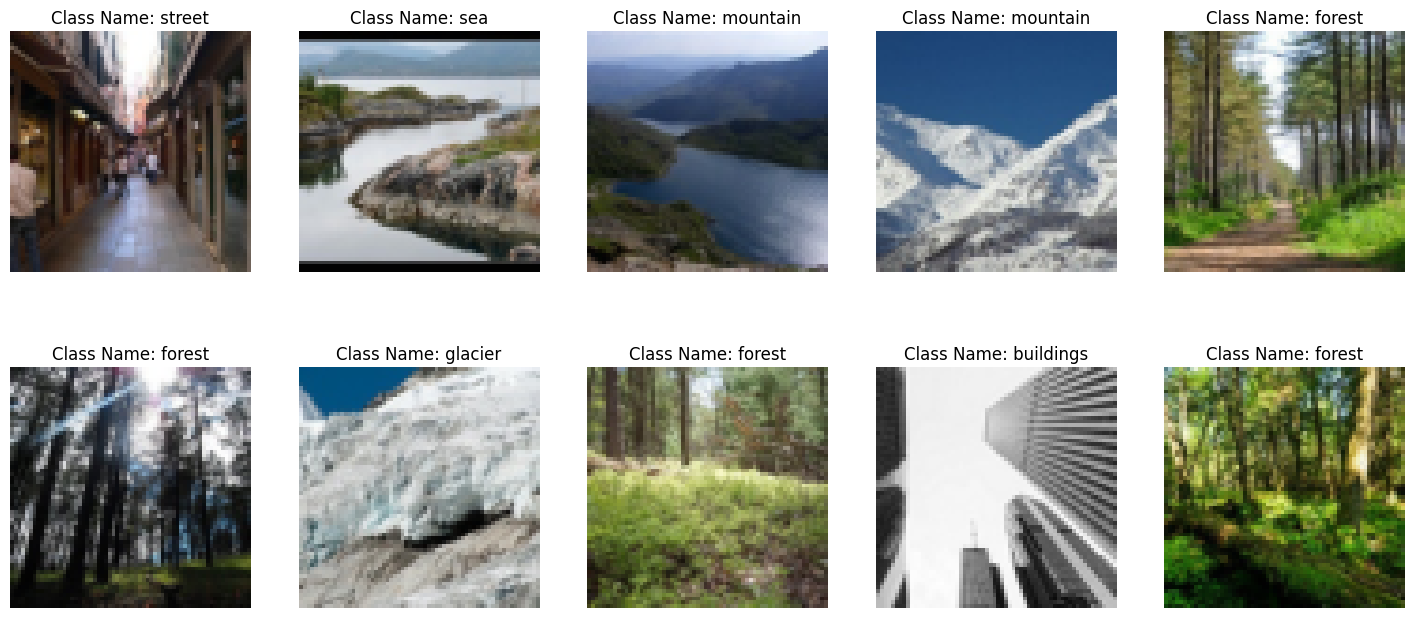

In [53]:
display_images(dataset = custom_train_data, classes = custom_train_data.classes, n = 10)